# Gradient Boosting Classifier Model
---
The model in this notebook was strongly influenced by Natural Chan.  The following gradient boosted classifier will be used in an ordinal regression dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score

import time

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from kappa_score import qwkappa

In [3]:
# The 'ID' feature is already dropped from cleaning notebook

# Open all source files as a pd dataframe
# This dataset will be used to train the gradient boosted model
orig_train = pd.read_csv('https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/train.csv')

#This dataset will be used to evaluate again the Kaggle compitition entry submission
orig_test = pd.read_csv('https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/test.csv')

# Addition datasets to explore the GradBoost model on actual wine data
red_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/red_white_data_noID.csv')
white_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/white_data_noID.csv')
red_white_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/red_white_data_noID.csv')
trainable_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/trainable_data_noID.csv')

# Drop 'ID' columns
orig_test = orig_test.drop(columns='Id')
orig_train = orig_train.drop(columns='Id')

# Create a place to save any generated files
gb_output_path = os.path.join(os.getcwd(),'grad boost output')
os.makedirs(gb_output_path, exist_ok = True)

In [4]:
# Split the data into training and testing sets
X_train = orig_train.drop('quality', axis=1)
y_train = orig_train['quality'].copy()
X_test = orig_test.copy()
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 42) #because it is the answer :)

In [5]:
# Create a StandardScaler instances
scaler = StandardScaler()


# Fit the StandardScaler
X_train_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_train_scaler.transform(X_train)
X_val_scaled = X_train_scaler.transform(X_val)

In [8]:
# Create a Gradient Boosting Regressor
model = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # number of weak learning trees
    'learning_rate': [0.01, 0.1, 0.2], # control possibility of overfitting.
    # Strong interaction with n_estimators: smaller learning rates require more n_estimators
    'max_depth': [3, 5, 7] #  size of each tree
}

# Perform grid search with cross-validation, mark timer start
start_time = time.time()
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_gb = grid_search.best_estimator_
grid_search_time = time.time()

# Make predictions on the test data using the best model
y_pred = best_gb.predict(X_val)

# Report how long it took to complete Grid search and prediction
end_time = time.time()
grid_time = grid_search_time - start_time
pred_time = end_time - grid_search_time
tot_time = end_time - start_time

print(f"Time to complete Grid Search: {grid_time:.6f} seconds")
print(f"Time to complete prediction: {pred_time:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time:.6f} seconds")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.556 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.578 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.596 total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.565 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.588 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.565 total time=   1.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.611 total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.574 total time=   1.7s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.591 to

In [9]:
# Create a Gradient Boosting Regressor
model = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # number of weak learning trees
    'learning_rate': [0.01, 0.1, 0.2], # control possibility of overfitting.
    # Strong interaction with n_estimators: smaller learning rates require more n_estimators
    'max_depth': [3, 5, 7] #  size of each tree
}

# Perform grid search with cross-validation, mark timer start
start_time_scaled = time.time()
grid_search_scaled = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid_search_scaled.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_gb_scaled = grid_search_scaled.best_estimator_
grid_search_time_scaled = time.time()

# Make predictions on the test data using the best model
y_pred_from_scaled_X = best_gb_scaled.predict(X_val_scaled)

# Report how long it took to complete Grid search and prediction
end_time_scaled = time.time()
grid_time_scaled = grid_search_time_scaled - start_time_scaled
pred_time_scaled = end_time_scaled - grid_search_time_scaled
tot_time_scaled = end_time_scaled - start_time_scaled

print(f"Time to complete Grid Search: {grid_time_scaled:.6f} seconds")
print(f"Time to complete prediction: {pred_time_scaled:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time_scaled:.6f} seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.556 total time=   0.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.578 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.596 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.565 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.588 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.571 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.611 total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.574 total time=   1.7s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.591 to

In [10]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1 = f1_score(y_val, y_pred, average= 'weighted')
precision = precision_score(y_val, y_pred, average= 'weighted')
recall = recall_score(y_val, y_pred, average= 'weighted')
kappa = cohen_kappa_score(y_val, y_pred, weights='quadratic')

print(f"Best Estimators: {best_gb.n_estimators}")
print(f"Best Learning Rate: {best_gb.learning_rate}")
print(f"Best Max Depth: {best_gb.max_depth}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Kappa, quadratic weighted: {kappa:.4f}")

Best Estimators: 200
Best Learning Rate: 0.01
Best Max Depth: 3
Accuracy: 0.59
F1: 0.57
Precision: 0.59
Recall: 0.59
Kappa, quadratic weighted: 0.4648


In [11]:
# Calculate metrics
accuracy_scaled = accuracy_score(y_val, y_pred_from_scaled_X)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1_scaled = f1_score(y_val, y_pred_from_scaled_X, average= 'weighted')
precision_scaled = precision_score(y_val, y_pred_from_scaled_X, average= 'weighted')
recall_scaled = recall_score(y_val, y_pred_from_scaled_X, average= 'weighted')
kappa_scaled = cohen_kappa_score(y_val, y_pred_from_scaled_X, weights='quadratic')

print(f"Best Estimators: {best_gb_scaled.n_estimators}")
print(f"Best Learning Rate: {best_gb_scaled.learning_rate}")
print(f"Best Max Depth: {best_gb_scaled.max_depth}")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1: {f1_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Kappa, quadratic weighted: {kappa_scaled:.4f}")

Best Estimators: 200
Best Learning Rate: 0.01
Best Max Depth: 3
Accuracy: 0.59
F1: 0.57
Precision: 0.59
Recall: 0.59
Kappa, quadratic weighted: 0.4648


In [13]:
# Change the number of weak learner trees
# Create a Gradient Boosting Regressor
model_2 = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid_2 = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
start_time_2 = time.time()
grid_search_2 = GridSearchCV(model_2, param_grid_2, cv=5, verbose=3)
grid_search_2.fit(X_train, y_train)

# Get the best model from grid search
best_gb_2 = grid_search_2.best_estimator_
grid_search_time_2 = time.time()

# Make predictions on the test data using the best model
y_pred_2 = best_gb_2.predict(X_val)

# Report how long it took to complete Grid search and prediction
end_time_2 = time.time()
grid_time_2 = grid_search_time_2 - start_time_2
pred_time_2 = end_time_2 - grid_search_time_2
tot_time_2 = end_time_2 - start_time_2

print(f"Time to complete Grid Search: {grid_time_2:.6f} seconds")
print(f"Time to complete prediction: {pred_time_2:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time_2:.6f} seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.568 total time=   1.7s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.584 total time=   1.6s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.547 total time=   1.6s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.547 total time=   1.7s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.558 total time=   1.7s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.574 total time=   3.3s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.578 total time=   3.4s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.581 total time=   3.4s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.562 total time=   3.5s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;,

In [21]:
# Change the number of weak learner trees
# Create a Gradient Boosting Regressor
model_2_scaled = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid_2_scaled = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
start_time_2_scaled = time.time()
grid_search_2_scaled = GridSearchCV(model_2_scaled, param_grid_2_scaled, cv=5, verbose=3)
grid_search_2_scaled.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_gb_2_scaled = grid_search_2_scaled.best_estimator_
grid_search_time_2_scaled = time.time()

# Make predictions on the test data using the best model
y_pred_2_from_X_scaled = best_gb_2_scaled.predict(X_val_scaled)

# Report how long it took to complete Grid search and prediction
end_time_2_scaled = time.time()
grid_time_2_scaled = grid_search_time_2_scaled - start_time_2_scaled
pred_time_2_scaled = end_time_2_scaled - grid_search_time_2_scaled
tot_time_2_scaled = end_time_2_scaled - start_time_2_scaled

print(f"Time to complete Grid Search: {grid_time_2_scaled:.6f} seconds")
print(f"Time to complete prediction: {pred_time_2_scaled:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time_2_scaled:.6f} seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.568 total time=   1.7s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.584 total time=   1.7s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.547 total time=   1.7s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.547 total time=   1.7s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.558 total time=   1.7s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.574 total time=   3.3s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.578 total time=   3.3s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.581 total time=   3.2s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.562 total time=   3.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;,

In [22]:
# Calculate metrics
accuracy_2 = accuracy_score(y_val, y_pred_2)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1_2 = f1_score(y_val, y_pred_2, average= 'weighted')
precision_2 = precision_score(y_val, y_pred_2, average= 'weighted')
recall_2 = recall_score(y_val, y_pred_2, average= 'weighted')
kappa_scaled_2 = cohen_kappa_score(y_val, y_pred_2, weights='quadratic')

print(f"Best Estimators: {best_gb_2.n_estimators}")
print(f"Best Learning Rate: {best_gb_2.learning_rate}")
print(f"Best Max Depth: {best_gb_2.max_depth}")
print(f"Accuracy: {accuracy_2:.2f}")
print(f"F1: {f1_2:.2f}")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"Kappa, quadratic weighted: {kappa_scaled_2:.4f}")

Best Estimators: 400
Best Learning Rate: 0.01
Best Max Depth: 3
Accuracy: 0.59
F1: 0.57
Precision: 0.58
Recall: 0.59
Kappa, quadratic weighted: 0.4534


In [23]:
# Calculate metrics
accuracy_2_scaled = accuracy_score(y_val, y_pred_2_from_X_scaled)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1_2_scaled = f1_score(y_val, y_pred_2_from_X_scaled, average= 'weighted')
precision_2_scaled = precision_score(y_val, y_pred_2_from_X_scaled, average= 'weighted')
recall_2_scaled = recall_score(y_val, y_pred_2_from_X_scaled, average= 'weighted')
kappa_scaled_2_scaled = cohen_kappa_score(y_val, y_pred_2_from_X_scaled, weights='quadratic')

print(f"Best Estimators: {best_gb_2_scaled.n_estimators}")
print(f"Best Learning Rate: {best_gb_2_scaled.learning_rate}")
print(f"Best Max Depth: {best_gb_2_scaled.max_depth}")
print(f"Accuracy: {accuracy_2_scaled:.2f}")
print(f"F1: {f1_2_scaled:.2f}")
print(f"Precision: {precision_2_scaled:.2f}")
print(f"Recall: {recall_2_scaled:.2f}")
print(f"Kappa, quadratic weighted: {kappa_scaled_2_scaled:.4f}")

Best Estimators: 200
Best Learning Rate: 0.01
Best Max Depth: 3
Accuracy: 0.59
F1: 0.57
Precision: 0.59
Recall: 0.59
Kappa, quadratic weighted: 0.4648


# Compare Scaled and Original Datasets
It seams there is no difference in computation time or kappa scores between the scaled and unscaled (original) datasets.

In [24]:
print("--------------------------------------------------------")

best_hp = grid_search.best_params_
print(f"First Grad Boosted Model best hyperparameters: ")
print(f"     {best_hp}")
print()
print("--------------------------------------------------------")
print(f"First Grad Boosted Model Classification Report")
print(classification_report(y_val,y_pred))
print()
print("--------------------------------------------------------")
score = cohen_kappa_score(y_val, y_pred, weights='quadratic')
print()
print(f"First Grad Boosted Quadratic Weighted Kappa score: {score:.3f}")
print()
print("--------------------------------------------------------")

--------------------------------------------------------
First Grad Boosted Model best hyperparameters: 
     {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

--------------------------------------------------------
First Grad Boosted Model Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.12      0.22         8
           5       0.65      0.74      0.69       169
           6       0.52      0.60      0.56       158
           7       0.61      0.32      0.42        69
           8       0.00      0.00      0.00         6

    accuracy                           0.59       412
   macro avg       0.46      0.30      0.32       412
weighted avg       0.59      0.59      0.57       412


--------------------------------------------------------

First Grad Boosted Quadratic Weighted Kappa score: 0.465

--------------------------------------------------------


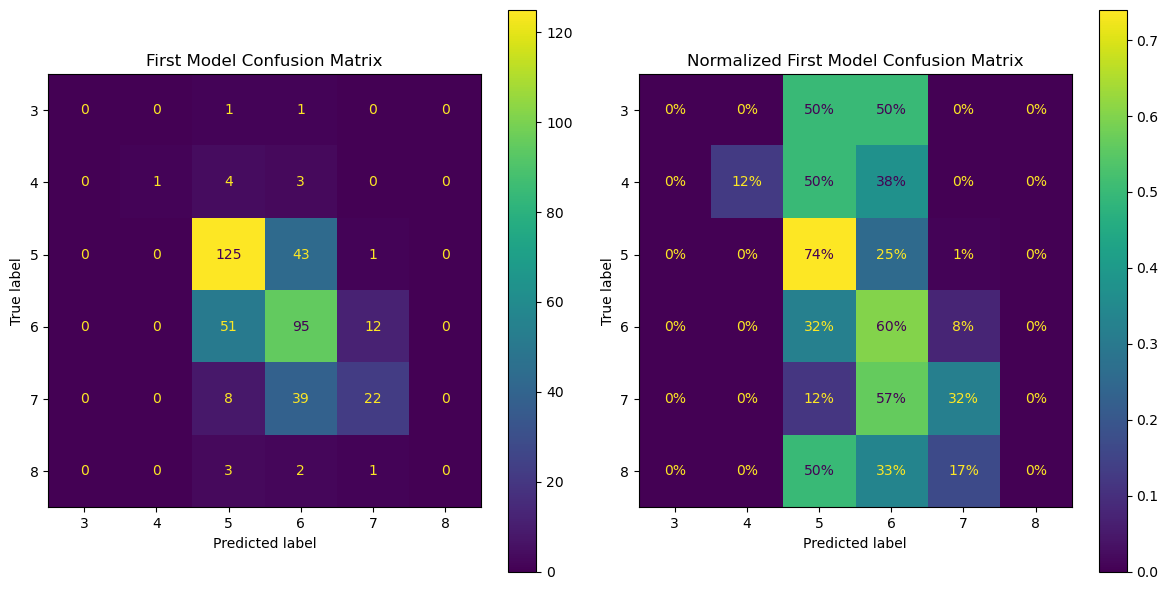

In [25]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first confusion matrix
axs[0].set_title("First Model Confusion Matrix")
conf_matrix_display_1 = ConfusionMatrixDisplay.from_predictions(y_val, y_pred, ax=axs[0])
# conf_matrix_display_1.plot(cmap=plt.cm.Blues, ax=axs[0])

# Calculate sample_weight
sample_weight = (y_pred != y_val)

# Plot the second confusion matrix
axs[1].set_title("Normalized First Model Confusion Matrix")
conf_matrix_display_2 = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                              #  sample_weight=sample_weight,
                                                               normalize='true',
                                                               values_format='.0%',
                                                               ax=axs[1])
# conf_matrix_display_2.plot(cmap=plt.cm.Blues, ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.savefig(f"{gb_output_path}/gb_first_model_confusion_matrix.png")
plt.show()

In [26]:
print("--------------------------------------------------------")

best_hp_2 = grid_search_2.best_params_
print(f"First Grad Boosted Model best hyperparameters: ")
print(f"     {best_hp_2}")
print()
print("--------------------------------------------------------")
print(f"First Grad Boosted Model Classification Report")
print(classification_report(y_val,y_pred_2))
print()
print("--------------------------------------------------------")
score_2 = cohen_kappa_score(y_val, y_pred_2, weights='quadratic')
print()
print(f"Second Grad Boosted Quadratic Weighted Kappa score: {score_2:.3f}")
print()
print("--------------------------------------------------------")

--------------------------------------------------------
First Grad Boosted Model best hyperparameters: 
     {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}

--------------------------------------------------------
First Grad Boosted Model Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.12      0.22         8
           5       0.65      0.73      0.69       169
           6       0.52      0.59      0.56       158
           7       0.57      0.35      0.43        69
           8       0.00      0.00      0.00         6

    accuracy                           0.59       412
   macro avg       0.46      0.30      0.32       412
weighted avg       0.58      0.59      0.57       412


--------------------------------------------------------

Second Grad Boosted Quadratic Weighted Kappa score: 0.453

--------------------------------------------------------


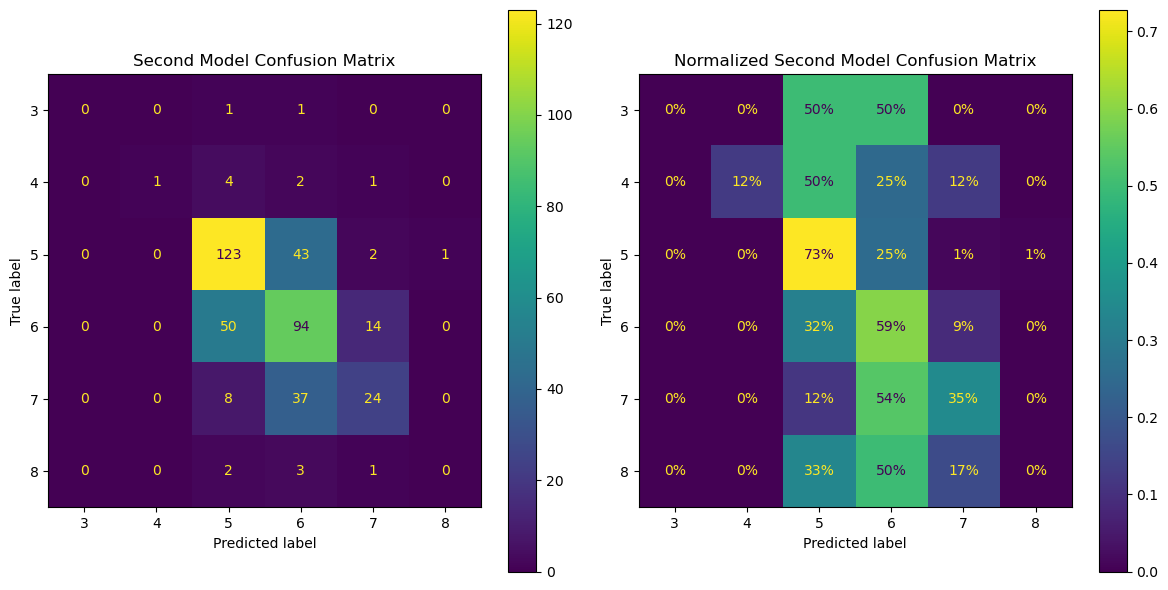

In [27]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first confusion matrix
axs[0].set_title("Second Model Confusion Matrix")
conf_matrix_display_1 = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2, ax=axs[0])
# conf_matrix_display_1.plot(cmap=plt.cm.Blues, ax=axs[0])

# Calculate sample_weight
sample_weight = (y_pred != y_val)

# Plot the second confusion matrix
axs[1].set_title("Normalized Second Model Confusion Matrix")
conf_matrix_display_2 = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2,
                                                            #    sample_weight=sample_weight,
                                                               normalize='true',
                                                               values_format='.0%',
                                                               ax=axs[1])
# conf_matrix_display_2.plot(cmap=plt.cm.Blues, ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.savefig(f"{gb_output_path}/gb_second_model_confusion_matrix.png")
plt.show()